### Linear Regression for Solving Regression Problems  

Linear regression is a widely used technique for addressing regression problems. In this approach, the target variable is modeled as a **linear combination** (or weighted sum) of input features. The model's predictions are evaluated using a loss function, such as the **Root Mean Squared Error (RMSE)**, to measure performance.  

**Visual Summary:**  
![LR1.png](LR1.png)



 Working? 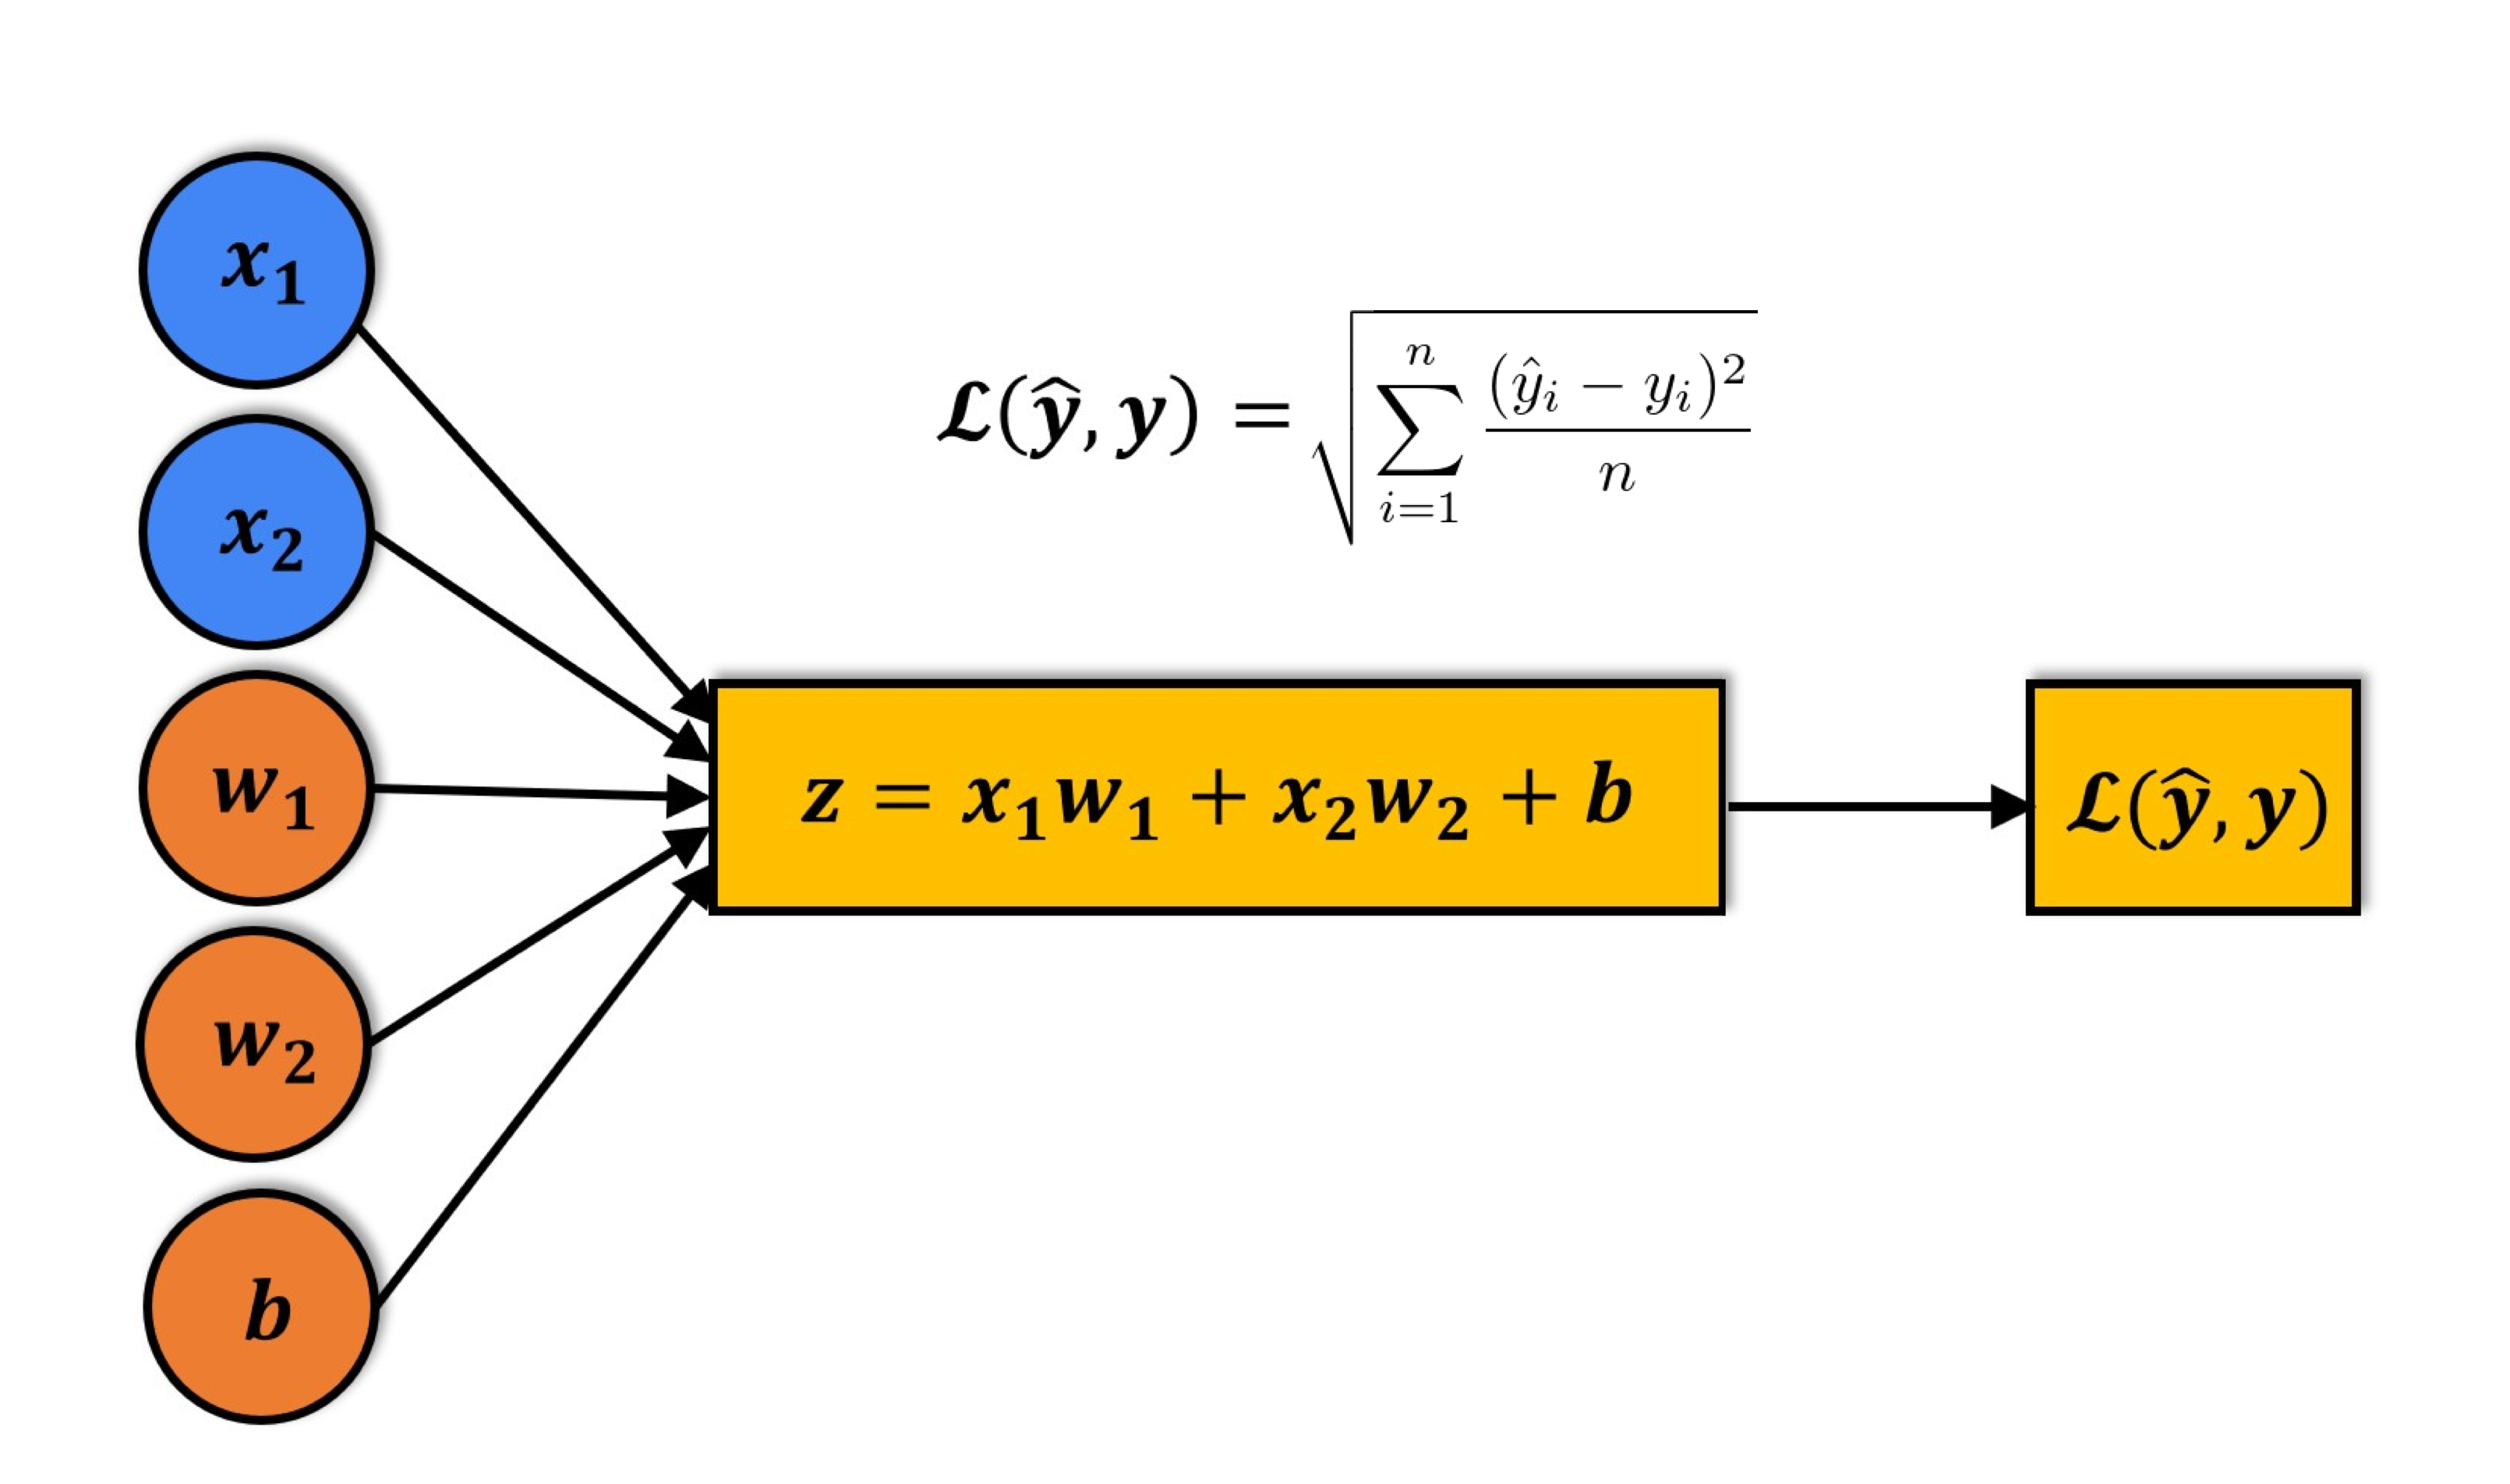

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the housing SalePrice dataset
df = pd.read_csv('train.csv')

# Explore the data
print(df.head())
print(df.info())
print(df.describe())

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # For numerical columns
df['LotFrontage'] = imputer.fit_transform(df[['LotFrontage']])

In [ ]:

# Visualize correlations between features
plt.figure(figsize=(12, 8))

# Filter only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Create a heatmap for the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


# Choose relevant features for linear regression
features = ['LotArea', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'FullBath', 'HalfBath']
X = df[features]
y = df['SalePrice']

# Log transform the target variable to normalize it
y = np.log1p(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Fit the linear regression model
model.fit(X_train_scaled, y_train)

# Predict using the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE for better interpretability
r2 = r2_score(y_test, y_pred)





In [ ]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualize the model performance
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price')
plt.show()

# Residual plot to check for homoscedasticity
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Price')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print('Feature Importance:')
print(feature_importance)